## LoRa modulation overview

**Chirp** stands for **Compressed High Intensity Radar Pulse**. It is a signal which frequency either increase or decrease with time. It is very common is sonar and radar. It is also used in spread spectrum, for example LoRa PHY.

If the frequency increases, chirp is called **up-chirp** and if the frequency decreases, chirp is called **down-chirp**.

Usual waveform is best described using next formulation

$$ x(t) = sin(\theta (t)) $$

where instantaneous frequency is

$$ f(t) = \frac{1}{ 2\pi} \frac{d\theta(t)}{dt} $$

and (instantaneous) chirpyness - the rate of change of the frequency in specific moment is

$$ \theta(t) = \frac{1}{ 2\pi} \frac{df(t)}{dt} $$

For LoRa chirps are **linear** which means that frequency varies linearly with time.

$$ f(t) = f_{0} + kt $$

where k is *slope* of a chirp

$$ k = \frac{f_{1}-f_{0}}{T} $$

Phase is described with next formulation

$$ \theta (t) = \theta_{0} + 2\pi \int_{0}^{t}f(\tau)d\tau $$

$$ \theta (t) = \theta_{0} + 2\pi \int_{0}^{t}(f_{0} + kt) d\tau $$

$$ \theta (t) = \theta_{0} + 2\pi (f_{0}t + \frac{k}{2}t^{2}) $$

and is called quadratic phase.

There are also non-linear or exponential chirps where the frequency of the signal varies with a geometric relationship over time, more on this [here](https://en.wikipedia.org/wiki/Chirp#Exponential).

## LoRa

LoRa is LPWAN (Low-Power Wide Area Network) protocol that targets deployment where end-devices (in context of IoT) have limited energy, small bit-rate needs (usually sensors) and no CSMA protocol.

LoRa lower layer is its physical layer or PHY which uses Chirp Spread Spectrum (CSS) radio modulation technique. Second layer is called LoRaWAN which is used for media access control in this LPWAN network.

The LoRa modulation is not open sourced but known fact is that it is chirp spread spectrum modulation which uses frequency chirps with **linear** variation of frequency over time in order to encode information. This modulation is immune to the Doppler effect, equivalent to a frequency offset and receivers are able to lock on the fequency chirps received, offering a sensitivity of the order of -130dBm. 

## Generation of LoRa-type chirp signals

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
# all rights go to Allen Downey
# code can be found on GitHub@AllenDowney/ThinkDSP
import thinkdsp
import thinkplot

LoRa chirp signal for bandwidth of 125kHz.

In [3]:
LoRa_signal = thinkdsp.Chirp(start=0, end=125000)
LoRa_wave = LoRa_signal.make_wave(duration=1)

How does it look like (full waveform in the period [0 - 1] second):

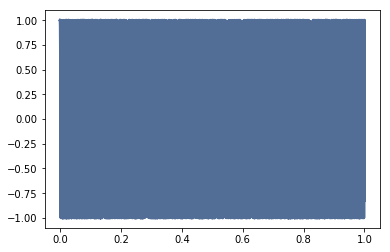

In [4]:
LoRa_wave.plot()

Since there is no visual distinction between any sinusoidal wave on 125kHz of bandwidth lets see waveform near beggining plot:

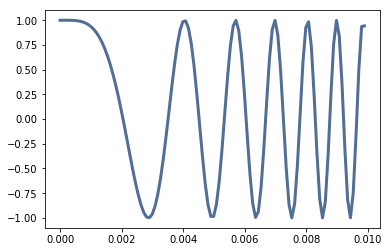

In [5]:
LoRa_wave.segment(start=0, duration=0.01).plot()

...and near the end:

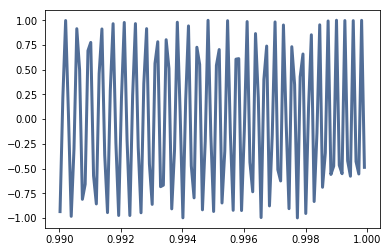

In [6]:
LoRa_wave.segment(start=0.99, duration=0.01).plot()

## Spectrogram

Will show distribution of energy in the defined bandwidth. It won't show how the energy is spread out in time. In other words, up-chirp and down-chirps cannot be differentiated using regular spectrogram.

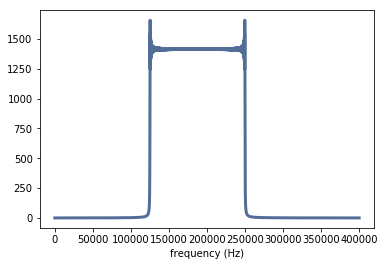

In [7]:
LoRa_signal = thinkdsp.Chirp(start=125000, end=250000)
LoRa_wave = LoRa_signal.make_wave(duration=1, framerate=1000000)
spectrum = LoRa_wave.make_spectrum()
spectrum.plot(high=400000)
thinkplot.config(xlabel='frequency (Hz)')

A spectrogram is a visualization of a short-time DFT that lets you see how the spectrum varies over time.

Frequency will be placed on y-axis and time will be placed on x-axis, darkness of line implicates amplitude level.

In [8]:
def plot_spectrogram(wave, seg_length):
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=140000)
    thinkplot.show(xlabel='Time(s)', 
                    ylabel='Frequency (Hz)')

Time resolution (s) 0.001024
Frequency resolution (Hz) 976.5625


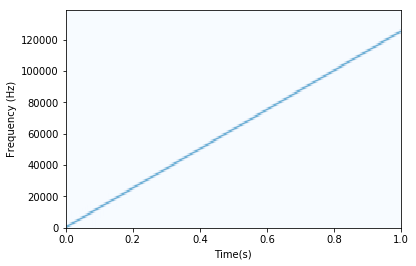

<Figure size 576x432 with 0 Axes>

In [9]:
LoRa_signal = thinkdsp.Chirp(start=0, end=125000)
LoRa_wave = LoRa_signal.make_wave(duration=1, framerate=1000000)
plot_spectrogram(LoRa_wave, 1024)

If you increase the segment length, you get better frequency resolution, worse time resolution.

Time resolution (s) 0.008192
Frequency resolution (Hz) 122.0703125


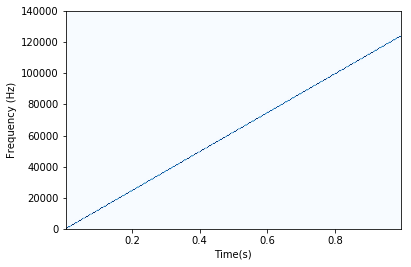

<Figure size 576x432 with 0 Axes>

In [10]:
plot_spectrogram(LoRa_wave, 8192)

If you decrease the segment length, you get better time resolution, worse frequency resolution.

Time resolution (s) 0.000256
Frequency resolution (Hz) 3906.25


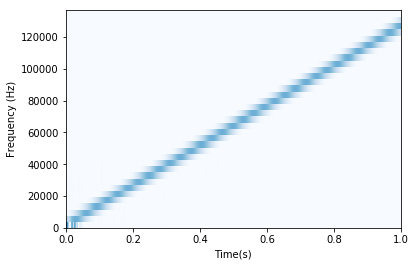

<Figure size 576x432 with 0 Axes>

In [11]:
plot_spectrogram(LoRa_wave, 256)

In time–frequency analysis, uncertainty principles are referred to as the **Gabor limit**, after Dennis Gabor, or sometimes the Heisenberg–Gabor limit. The basic result, which follows from "Benedicks's theorem", below, is that a function cannot be both time limited and band limited (a function and its Fourier transform cannot both have bounded domain).